In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [5]:
from sklearn.datasets import load_digits

# Import data

In [6]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [7]:
df = pd.DataFrame(digits.data)
df.shape

(1797, 64)

In [8]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<Figure size 640x480 with 0 Axes>

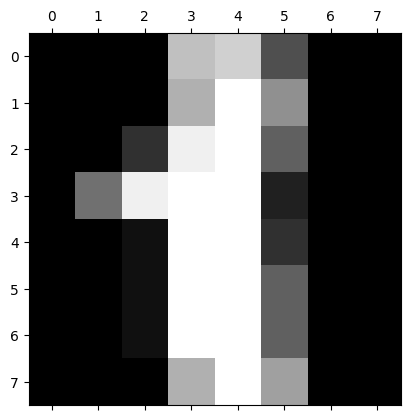

In [9]:
plt.gray()
plt.matshow(digits.images[1])
plt.show()

# Train

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [13]:
X = digits.data
y = digits.target

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)
print(f'{X_train.shape} and {X_test.shape}')

(1437, 64) and (360, 64)


class SVC(
    *,
    C: Float = 1,
    kernel: ((...) -> Any) | Literal['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'] = "rbf",
    degree: Int = 3,
    gamma: float | Literal['scale', 'auto'] = "scale",
    coef0: Float = 0,
    shrinking: bool = True,
    probability: bool = False,
    tol: Float = 0.001,
    cache_size: Float = 200,
    class_weight: Mapping | str | None = None,
    verbose: bool = False,
    max_iter: Int = ...,
    decision_function_shape: Literal['ovo', 'ovr'] = "ovr",
    break_ties: bool = False,
    random_state: Int | None = None
)

# Model

In [ ]:
1/ Regularization: C\
2/ Kernel\
3/ Gamma

In [52]:
# with GridSearch
param_grid = {
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [1,10,15]
}
param_grid

{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 10, 15]}

In [38]:
model = SVC()

In [53]:
clf = GridSearchCV(model, param_grid, cv=5, return_train_score= False)

In [54]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 15],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [58]:
gridsearchcv_res = pd.DataFrame(clf.cv_results_)
gridsearchcv_res[['params', 'param_C',  'param_kernel','mean_test_score', 'rank_test_score']]

,params,param_C,param_kernel,mean_test_score,rank_test_score
0,"{'C': 1, 'kernel': 'linear'}",1,linear,0.970768,7
1,"{'C': 1, 'kernel': 'poly'}",1,poly,0.988173,5
2,"{'C': 1, 'kernel': 'rbf'}",1,rbf,0.986082,6
3,"{'C': 1, 'kernel': 'sigmoid'}",1,sigmoid,0.903291,10
4,"{'C': 10, 'kernel': 'linear'}",10,linear,0.970768,7
5,"{'C': 10, 'kernel': 'poly'}",10,poly,0.988870,3
6,"{'C': 10, 'kernel': 'rbf'}",10,rbf,0.991655,1
7,"{'C': 10, 'kernel': 'sigmoid'}",10,sigmoid,0.810719,12
8,"{'C': 15, 'kernel': 'linear'}",15,linear,0.970768,7
9,"{'C': 15, 'kernel': 'poly'}",15,poly,0.988870,3


In [60]:
print(f'best score: {clf.best_score_} and best param: {clf.best_params_}')

best score: 0.9916545683313978 and best param: {'C': 10, 'kernel': 'rbf'}


In [61]:
# test
model2 = SVC(C=10, kernel='rbf' )
model2.fit(X_train, y_train)

SVC(C=10)

In [63]:
y_pred = model2.predict(X_test)


In [64]:
model2.score(X_test, y_test)

0.9861111111111112

<Axes: >

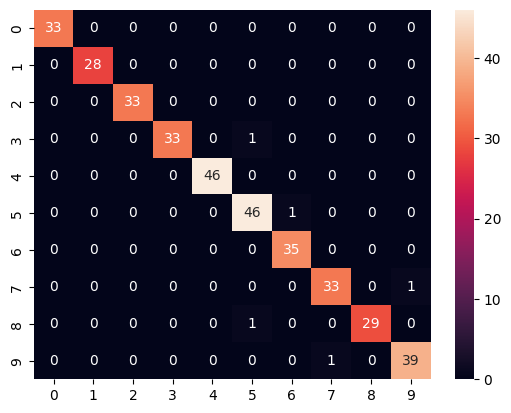

In [65]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)